# Multiple Linear Regression

## Bike sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

We have to build a model for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Reading and Understanding the data

In [1]:
# Importing various libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataset

bike = pd.read_csv("day.csv")

In [3]:
# Check the head of the dataset

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01/01/2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02/01/2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03/01/2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04/01/2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05/01/2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# checking the shape

bike.shape

(730, 16)

In [5]:
#Checking the datatypes and info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- No missing values in the dataset so no need to impute any values

In [6]:
# Checking the numerical aspects

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Removing the unwanted columns

In [7]:
# Instant is just the index of the data
# dteday is just date of the values which can be get by weekday and month
# casual and registered are stored in cnt variable

bike.drop(columns = ["instant","dteday","casual","registered"], axis=1, inplace=True)


In [8]:
#check the shape again
bike.shape

(730, 12)

In [9]:
# Encoding some columns to categorical

bike["season"] = bike["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
bike["weathersit"] = bike["weathersit"].map({1:"clear", 2:"misty", 3:"light rain", 4:"Heavy rain"})
bike["weekday"] = bike["weekday"].map({0:"sun", 1:"mon", 2:"tues", 3:"wed", 4:"thur",5:"fri",6:"sat"})
bike["mnth"] = bike["mnth"].map({1:"jan", 2:"feb", 3:"mar", 4:"apr",5:"may", 6:"june", 7:"july", 8:"aug",9:"sep", 10:"oct", 11:"nov", 12:"dec"})


In [10]:
#check the head of dataset

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tues,1,misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
# checking datatypes and null values

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Visualising the data

#### Visualising the  Numerical Variables 

<Figure size 1080x1440 with 0 Axes>

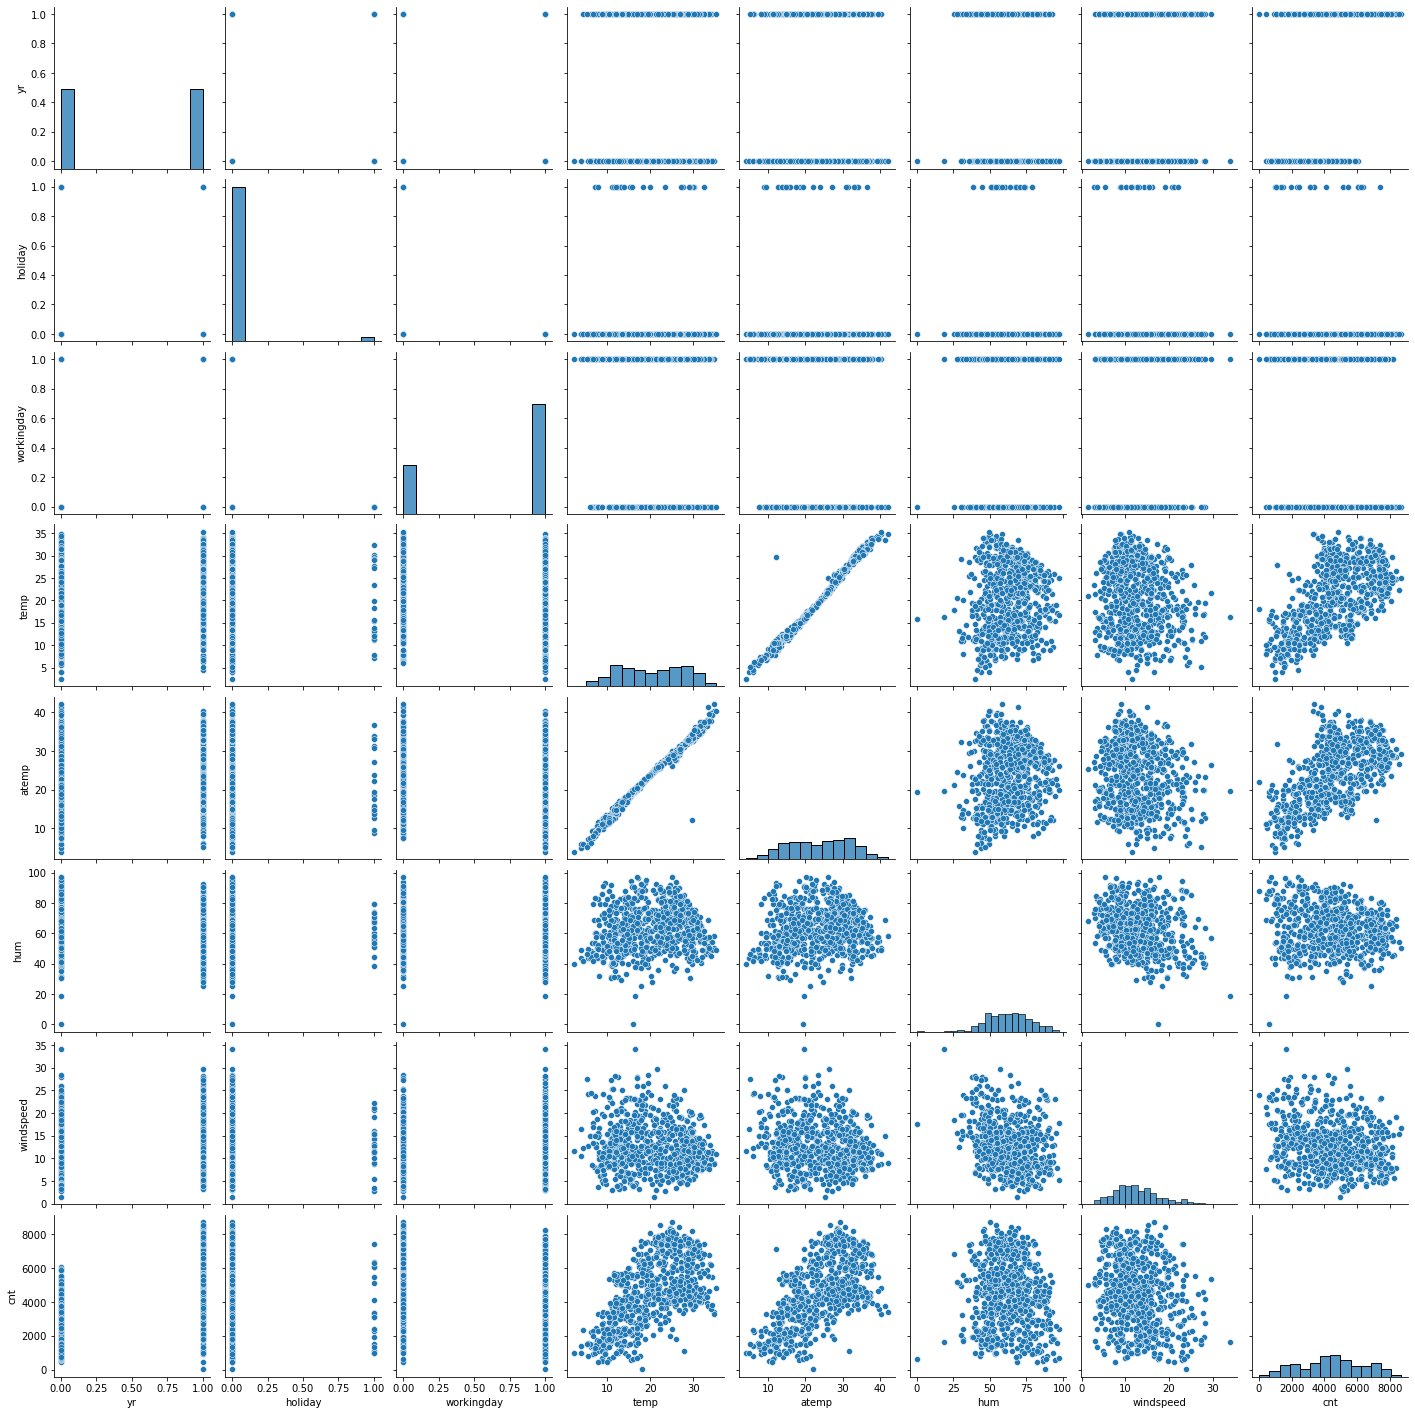

In [12]:
# plot pairplot to visualise the numerical variables

plt.figure(figsize=(15,20))
sns.pairplot(bike[["yr","holiday","workingday","temp","atemp","hum","windspeed","cnt"]])
plt.show()

#### Visualising Categorical variables

Let's make the boxplot for these categorical variables

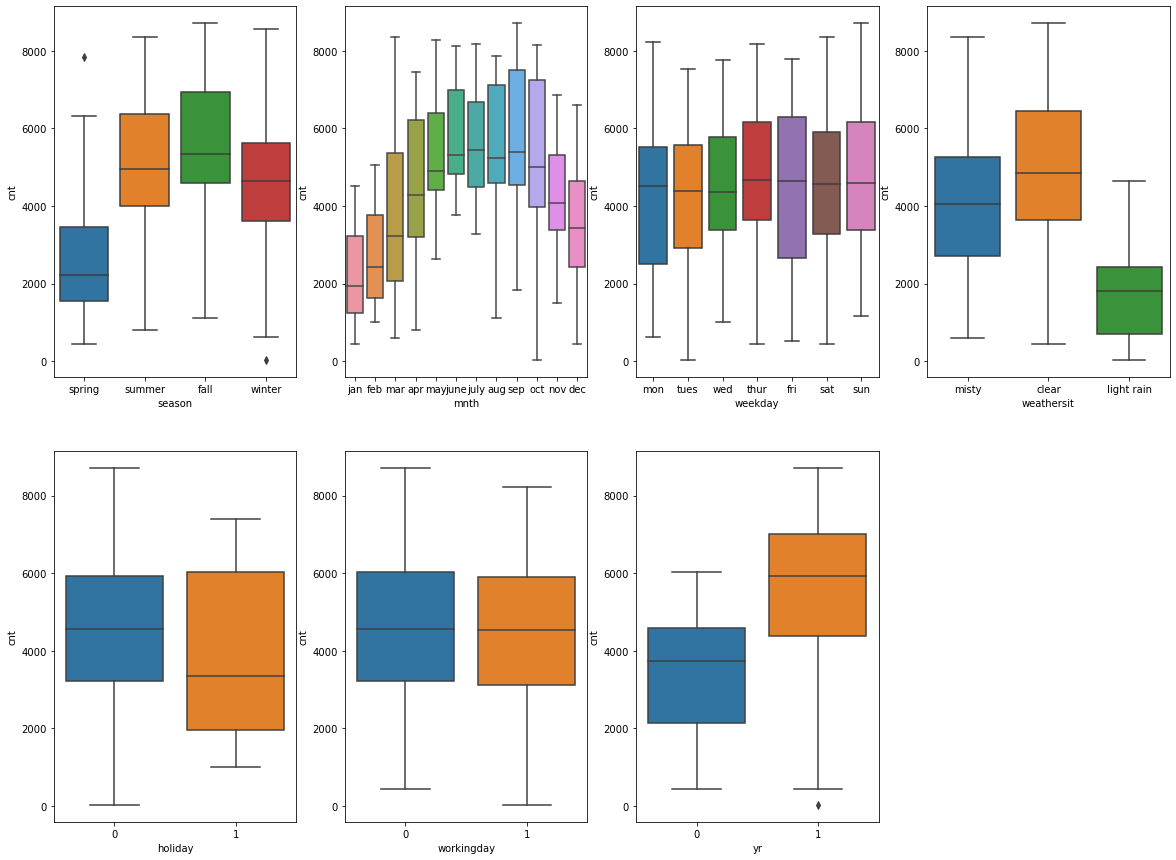

In [13]:
# visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 15))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

#### Inference:

- Fall season attracted more bookings  
- Most of the bookings done in the month of may,june,july,aug & sep and then it started decreasing  
- Friday,saturday and sunday has more number of bookings compare to other days  
- Bookings are more when the sky is clear.  

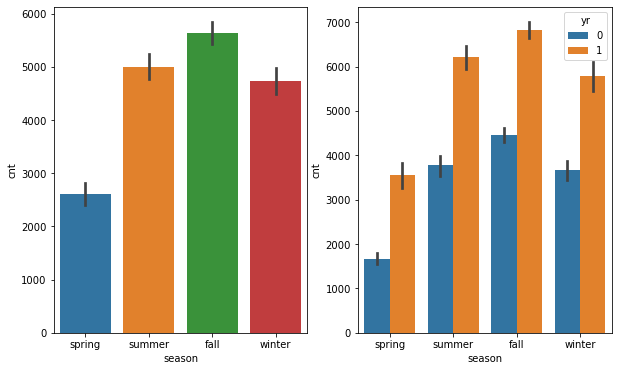

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(x='season', y='cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(x='season', y='cnt',data=bike, hue="yr")
plt.show()

#### Inference:
- Fall season attracted more bookings
- In each season booking increases in the year 2019 as compared to 2018

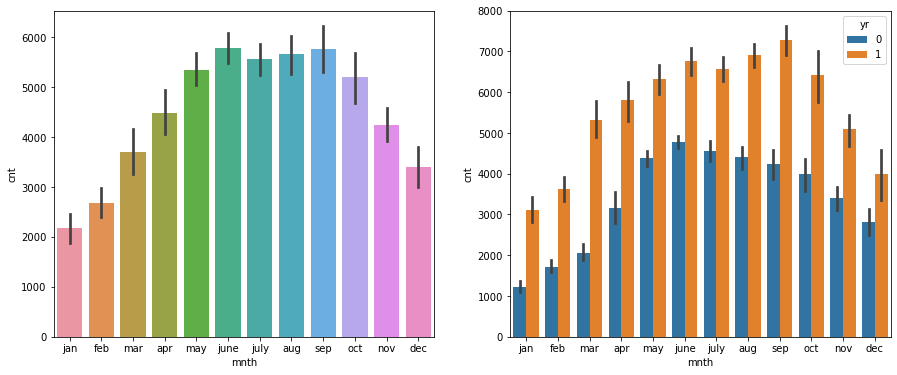

In [15]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='mnth', y='cnt',data=bike)
plt.subplot(1,2,2)
sns.barplot(x='mnth', y='cnt',data=bike, hue="yr")
plt.show()

#### Inference:
- Most of the bookings done in the month of may,june,july,aug & sep and then it started decreasing
- In each season booking increases in the year 2019 as compared to 2018

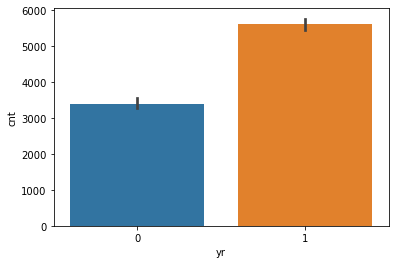

In [16]:
sns.barplot(x='yr', y='cnt',data=bike)
plt.show()

#### Inference:
- Booking increases in the year 2019 compared to 2018

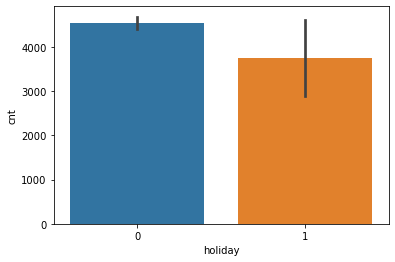

In [17]:
sns.barplot(x='holiday', y='cnt',data=bike)
plt.show()

#### Inference:
- booking decreases when there is a holiday, obviously people wants to spend family time on holidays

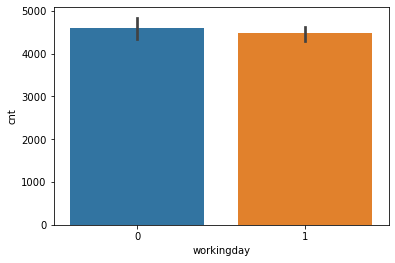

In [18]:
sns.barplot(x='workingday', y='cnt',data=bike)
plt.show()

#### Inference:
- Booking almost similar whether working day or not

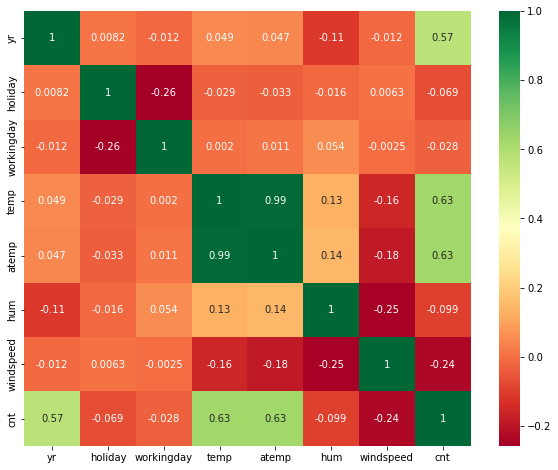

In [19]:
# Checking the correlation between numerical variables

plt.figure(figsize=(10,8))
sns.heatmap(bike[["yr","holiday","workingday","temp","atemp","hum","windspeed","cnt"]].corr(), annot=True, cmap='RdYlGn')
plt.show()

#### Inference:
- There is a high linear relationship between temp and atemp, means there is a multi-collinearity among them 

## Data Preparation

### Dummy variables

In [20]:
# Create dummy variables for variables season, mnth, weekday, weathersit 

season_dummy = pd.get_dummies(bike['season'], drop_first=True)
mnth_dummy = pd.get_dummies(bike['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(bike['weekday'], drop_first=True)
weathers_dummy = pd.get_dummies(bike['weathersit'], drop_first=True)

In [21]:
#Merging the dataset with the dummy variables

bike = pd.concat([bike,season_dummy,mnth_dummy,weekday_dummy,weathers_dummy], axis=1)

In [22]:
#checking dataset after merging

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,oct,sep,mon,sat,sun,thur,tues,wed,light rain,misty
0,spring,0,jan,0,mon,1,misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tues,1,misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thur,1,clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [23]:
# dropping unwanted columns beacise we have created dummy variables from them

bike.drop(columns=["season","mnth","weekday","weathersit"], axis=1, inplace=True)

In [24]:
#checking the shape
bike.shape

(730, 30)

In [25]:
#checking info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  aug         730 non-null    uint8  
 12  dec         730 non-null    uint8  
 13  feb         730 non-null    uint8  
 14  jan         730 non-null    uint8  
 15  july        730 non-null    uint8  
 16  june        730 non-null    uint8  
 17  mar         730 non-null    uint8  
 18  may         730 non-null    uint8  
 19  nov         730 non-null    u

# Splitting the data into Train and Test sets

In [26]:
np.random.seed(0)
train_df, test_df = train_test_split(bike, train_size = 0.7, random_state = 100)

In [27]:
#shape of training dataset
train_df.shape

(510, 30)

In [28]:
#shape of test dataset
test_df.shape

(220, 30)

### Rescaling

In [29]:
# Using Minmax scaler for Rescaling

scaler = MinMaxScaler()

In [30]:
# Apply scaler to all the columns except the dummy variables and yes-no variables

num_var = ['temp','atemp','hum','windspeed','cnt']

train_df[num_var] = scaler.fit_transform(train_df[num_var])

In [31]:
#checking train dataset

train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thur,tues,wed,light rain,misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,1,0,0,0,0,1


In [32]:
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thur,tues,wed,light rain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


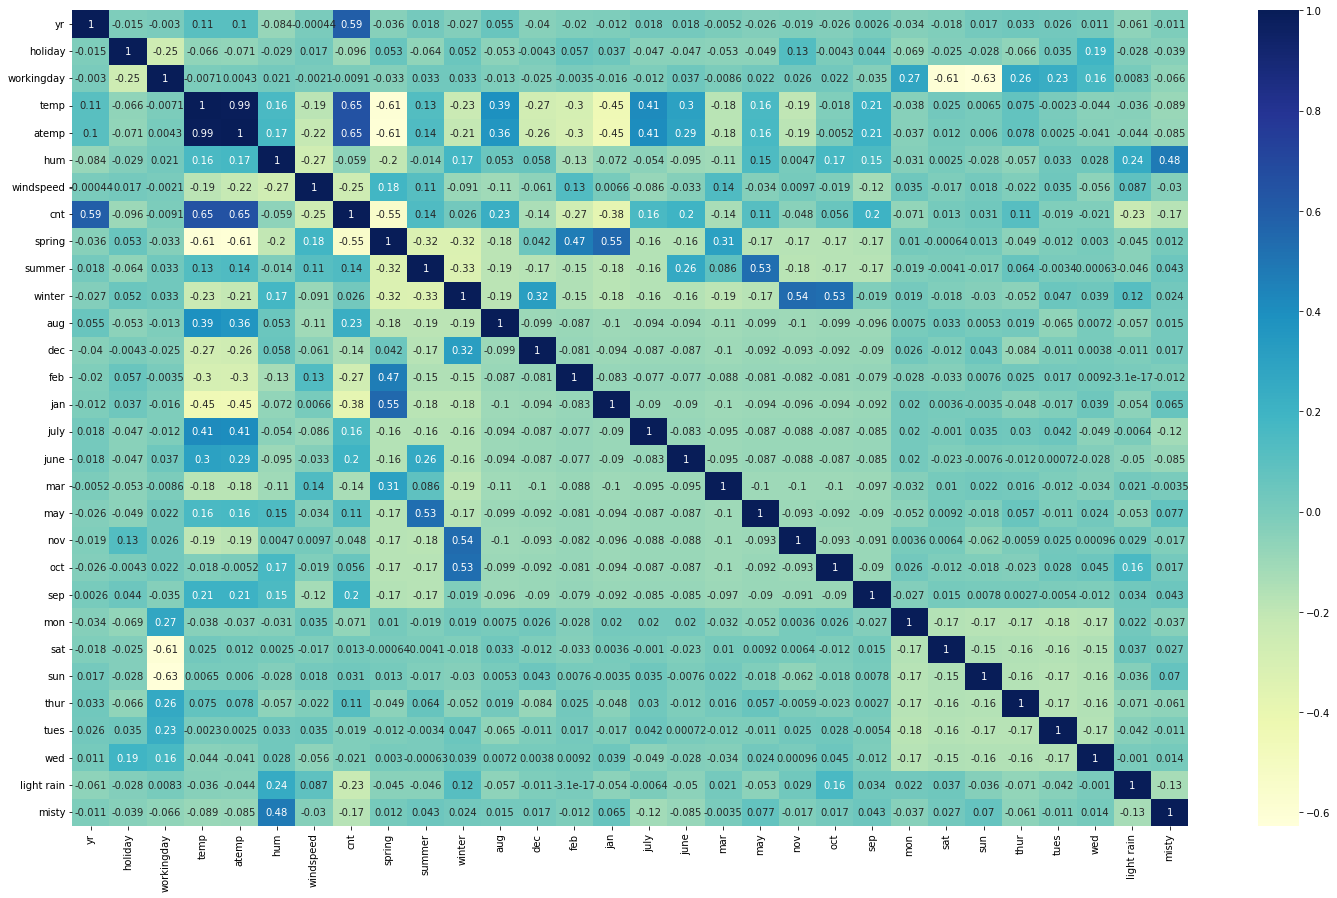

In [33]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 15))
sns.heatmap(train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

- As we noticed cnt seems to be highly correlated with both temp and atemp.Let's see a pairplot of cnt vs temp

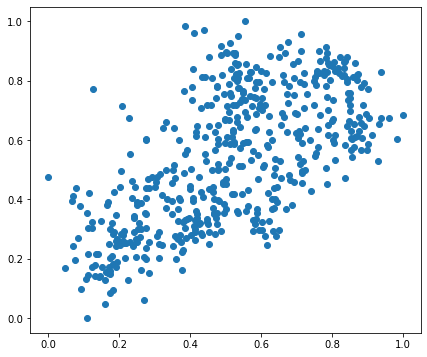

In [34]:
plt.figure(figsize=(7,6))
plt.scatter(train_df.cnt, train_df.temp)
plt.show()

### Dividing into X and Y sets for the model building

In [35]:
y_train = train_df.pop('cnt')
X_train = train_df

## Model Building

We will use the **LinearRegression** function from the Scikit learn model and use the RFE method

#### RFE (Recursive feature elimination)

In [36]:
# Running RFE with ouput variables as 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 10),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 12),
 ('mar', False, 15),
 ('may', False, 9),
 ('nov', True, 1),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 8),
 ('sat', False, 5),
 ('sun', False, 6),
 ('thur', False, 14),
 ('tues', False, 7),
 ('wed', False, 11),
 ('light rain', True, 1),
 ('misty', True, 1)]

In [38]:
# variables selected via RFE

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'dec', 'jan', 'july', 'nov', 'sep', 'light rain', 'misty'],
      dtype='object')

In [39]:
col2 = X_train.columns[~rfe.support_]
col2

Index(['workingday', 'atemp', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon',
       'sat', 'sun', 'thur', 'tues', 'wed'],
      dtype='object')

### Building model using statsmodel, for detailed statistics

In [40]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe

,yr,holiday,temp,hum,windspeed,spring,summer,winter,dec,jan,july,nov,sep,light rain,misty
576,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,0,1,1,0,0,0,0,0,1
79,0,0,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,0,1


In [41]:
# Creating function for calculating VIF

def calculatevif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [42]:
calculatevif(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
5,spring,4.37
7,winter,4.06
6,summer,2.82
14,misty,2.32
0,yr,2.09
11,nov,1.85
9,jan,1.75


In [43]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the  1st linear model
lm_1 = sm.OLS(y_train, X_train_rfe).fit()
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          8.15e-189
Time:                        10:57:56   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3197      0.036      8.859      0.000       0.249       0.391
yr             0.2304      0.008     28.487      0.000       0.215       0.246
holiday       -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp           0.4815      0.037     13.005      0.000       0.409       0.554
hum           -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed     -0.1887      0.026     -7.315      0.000      -0.239      -0.138
spring        -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer         0.0423      0.015      2.761      0.006       0.012       0.072
winter         0.1019      0.018      5.656      0.000       0.067       0.137
dec           -0.0355      0.018     -2.024      0.043      -0.070      -0.001
jan           -0.0434      0.018     -2.393      0.017      -0.079      -0.008
july          -0.0553      0.018     -3.030      0.003      -0.091      -0.019
nov           -0.0387      0.019     -2.057      0.040      -0.076      -0.002
sep            0.0755      0.017      4.466      0.000       0.042       0.109
light rain    -0.2465      0.026     -9.331      0.000      -0.298      -0.195
misty         -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# VIF of 'hum' is high so dropping hum column

X_train_rfe = X_train_rfe.drop("hum", axis=1)

In [45]:
# VIF for the new model

calculatevif(X_train_rfe)

,Features,VIF
0,const,63.35
5,spring,5.21
3,temp,4.10
7,winter,3.68
6,summer,2.74
11,nov,1.77
9,jan,1.67
8,dec,1.49
10,july,1.48
12,sep,1.33


In [46]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the  2nd linear model
lm_2 = sm.OLS(y_train, X_train_rfe).fit()
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          4.75e-186
Time:                        10:57:56   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2450      0.032      7.618      0.000       0.182       0.308
yr             0.2345      0.008     28.687      0.000       0.218       0.251
holiday       -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp           0.4387      0.036     12.093      0.000       0.367       0.510
windspeed     -0.1585      0.025     -6.276      0.000      -0.208      -0.109
spring        -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer         0.0349      0.015      2.251      0.025       0.004       0.065
winter         0.0869      0.018      4.831      0.000       0.052       0.122
dec           -0.0428      0.018     -2.413      0.016      -0.078      -0.008
jan           -0.0500      0.018     -2.719      0.007      -0.086      -0.014
july          -0.0500      0.019     -2.703      0.007      -0.086      -0.014
nov           -0.0395      0.019     -2.064      0.040      -0.077      -0.002
sep            0.0687      0.017      4.015      0.000       0.035       0.102
light rain    -0.2917      0.025    -11.840      0.000      -0.340      -0.243
misty         -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- p value of nov is high , so dropping this column

In [47]:
X_train_rfe = X_train_rfe.drop("nov", axis=1)

In [48]:
# VIF for new model

calculatevif(X_train_rfe)

,Features,VIF
0,const,59.31
5,spring,5.04
3,temp,3.83
7,winter,3.44
6,summer,2.66
9,jan,1.64
10,july,1.48
11,sep,1.29
8,dec,1.25
4,windspeed,1.12


In [49]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the  3rd linear model
lm_3 = sm.OLS(y_train, X_train_rfe).fit()
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          2.74e-186
Time:                        10:57:56   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2283      0.031      7.310      0.000       0.167       0.290
yr             0.2343      0.008     28.573      0.000       0.218       0.250
holiday       -0.0982      0.026     -3.783      0.000      -0.149      -0.047
temp           0.4581      0.035     13.031      0.000       0.389       0.527
windspeed     -0.1594      0.025     -6.291      0.000      -0.209      -0.110
spring        -0.0632      0.021     -2.979      0.003      -0.105      -0.022
summer         0.0404      0.015      2.635      0.009       0.010       0.070
winter         0.0774      0.017      4.438      0.000       0.043       0.112
dec           -0.0283      0.016     -1.731      0.084      -0.060       0.004
jan           -0.0451      0.018     -2.467      0.014      -0.081      -0.009
july          -0.0499      0.019     -2.686      0.007      -0.086      -0.013
sep            0.0742      0.017      4.373      0.000       0.041       0.108
light rain    -0.2878      0.025    -11.677      0.000      -0.336      -0.239
misty         -0.0793      0.009     -9.089      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       62.961   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.773
Skew:                          -0.660   Prob(JB):                     2.22e-32
Kurtosis:                       5.263   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- VIF of all variables are good
- p value of dec is high 

In [50]:
# Dropping dec column
X_train_rfe = X_train_rfe.drop("dec", axis=1)

In [51]:
# VIF for new model

calculatevif(X_train_rfe)

,Features,VIF
0,const,55.94
5,spring,5.03
3,temp,3.62
7,winter,3.43
6,summer,2.62
8,jan,1.56
9,july,1.48
10,sep,1.29
4,windspeed,1.11
11,light rain,1.05


In [52]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the  4th linear model
lm_4 = sm.OLS(y_train, X_train_rfe).fit()
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          8.14e-187
Time:                        10:57:56   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2154      0.030      7.088      0.000       0.156       0.275
yr             0.2343      0.008     28.517      0.000       0.218       0.250
holiday       -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp           0.4721      0.034     13.772      0.000       0.405       0.539
windspeed     -0.1549      0.025     -6.135      0.000      -0.205      -0.105
spring        -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer         0.0434      0.015      2.845      0.005       0.013       0.073
winter         0.0757      0.017      4.335      0.000       0.041       0.110
jan           -0.0383      0.018     -2.138      0.033      -0.073      -0.003
july          -0.0503      0.019     -2.706      0.007      -0.087      -0.014
sep            0.0764      0.017      4.506      0.000       0.043       0.110
light rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
misty         -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# We can drop jan variable as it has high p-value

X_train_rfe = X_train_rfe.drop(['jan'], axis = 1)

In [54]:
# VIF for new model

calculatevif(X_train_rfe)

,Features,VIF
0,const,52.57
5,spring,4.95
3,temp,3.38
7,winter,3.34
6,summer,2.60
8,july,1.48
9,sep,1.29
4,windspeed,1.09
10,light rain,1.05
11,misty,1.04


In [55]:
#Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the  5th linear model
lm_5 = sm.OLS(y_train, X_train_rfe).fit()
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          5.06e-187
Time:                        10:57:56   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
yr             0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer         0.0465      0.015      3.051      0.002       0.017       0.076
winter         0.0817      0.017      4.730      0.000       0.048       0.116
july          -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep            0.0768      0.017      4.517      0.000       0.043       0.110
light rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
misty         -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [57]:
# VIF for new model

calculatevif(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
5,summer,2.23
4,spring,2.08
0,yr,2.07
6,winter,1.78
7,july,1.58
10,misty,1.55
8,sep,1.34
9,light rain,1.08


In [58]:
# Adding constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

# Running the  6th linear model
lm_6 = sm.OLS(y_train, X_train_rfe).fit()
lm_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 28 Feb 2023   Prob (F-statistic):          5.06e-187
Time:                        10:57:57   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1994      0.030      6.746      0.000       0.141       0.258
yr             0.2336      0.008     28.352      0.000       0.217       0.250
holiday       -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp           0.4910      0.033     14.770      0.000       0.426       0.556
windspeed     -0.1479      0.025     -5.887      0.000      -0.197      -0.099
spring        -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer         0.0465      0.015      3.051      0.002       0.017       0.076
winter         0.0817      0.017      4.730      0.000       0.048       0.116
july          -0.0521      0.019     -2.790      0.005      -0.089      -0.015
sep            0.0768      0.017      4.517      0.000       0.043       0.110
light rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
misty         -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### All the p-values of variables are low and significant and there is no multi collinearity between the predictors
#### VIF of temp is little above 5 but we won't drop it because of business perspective & rest all VIF values are <5


## Residual Analysis of the Train data

To check whether the error terms are normally distributed or not, plot the histogram for that

In [59]:
y_train_pred = lm_6.predict(X_train_rfe)

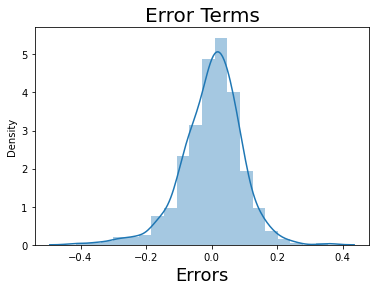

In [60]:
# Plot the histogram of the error terms

sns.distplot((y_train - y_train_pred), bins = 20)
plt.title('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)   
plt.show()

## Predictions on the Test set

Now we have checked normality of error terms its time to predict the values using model 6

#### Applying scaling on Test set

In [61]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
test_df[num_vars] = scaler.transform(test_df[num_vars])
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thur,tues,wed,light rain,misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [62]:
test_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,oct,sep,mon,sat,sun,thur,tues,wed,light rain,misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [63]:
y_test = test_df.pop('cnt')
X_test = test_df

In [64]:
X_test = X_test[col]

In [65]:
# Adding a constant variable 

X_test_new = sm.add_constant(X_test)

In [66]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test_new.drop(columns = ['hum','nov','dec','jan'], axis=1)

In [67]:
y_test_pred = lm_6.predict(X_test_new)

## Model Evaluation

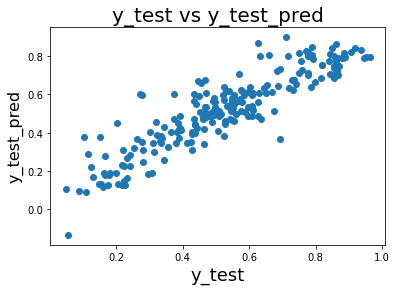

In [68]:
# Plotting y_test and y_test_pred to understand the spread

plt.scatter(y_test, y_test_pred)
plt.title('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 
plt.show()

In [69]:
# Calculating r2 score for test set

r2 = r2_score(y_test, y_test_pred)
round(r2,3)


0.805

In [70]:
n = X_test_new.shape[0]
n

220

In [71]:
p = X_test_new.shape[1]
p

12

In [72]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
print(adjusted_r2)

0.794


In [73]:
#checking all the parameters of the final model

round(lm_6.params,4)

const         0.1994
yr            0.2336
holiday      -0.0975
temp          0.4910
windspeed    -0.1479
spring       -0.0672
summer        0.0465
winter        0.0817
july         -0.0521
sep           0.0768
light rain   -0.2842
misty        -0.0802
dtype: float64

Equation of the best fitted line is:

cnt = 0.1994 + 0.2336 x yr - 0.0975 x holiday + 0.4910 x temp - 0.1479 x windspeed - 0.0672 x spring + 0.0465 x summer + 0.0817 x winter - 0.0521 x july + 0.0768 x sep - 0.2842 x lightrain - 0.0802 x misty

### Comparison between Training and test dataset

Train dataset r^2 : 0.835  
Train dataset adjusted r^2 : 0.832  
Test dataset r^2 : 0.805  
Test dataset adjusted r^2 : 0.794  

#### Demand of bikes depends upon the year,holiday,temperature,windspeed,spring,summer,winter,july,september,light rain and misty season